<a href="https://colab.research.google.com/github/gaikwadrupali1974/6th-Dec-Assignment/blob/main/7Dec_AssignmentK_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("/content/Customers.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6
5,6,Female,22,58000,76,Artist,0,2
6,7,Female,35,31000,6,Healthcare,1,3
7,8,Female,23,84000,94,Healthcare,1,3
8,9,Male,64,97000,3,Engineer,0,3
9,10,Female,30,98000,72,Artist,1,4


In [3]:
# Getting basic information about the data
print('Shape :',df.shape)
print('Number of rows:',df.shape[0])
print('Number of columns :', df.shape[1])

Shape : (2000, 8)
Number of rows: 2000
Number of columns : 8


In [4]:
# Getting an idea about the NULL values
df.isnull().sum().any()

True

In [16]:
df.dropna(inplace=True)

In [17]:
print(df)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [19]:
print(df[df.isnull().any(axis=1)])
df_cleaned = df.dropna()
print(df_cleaned)

Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income ($), Spending Score (1-100), Profession, Work Experience, Family Size]
Index: []
      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000  

In [22]:
df.replace(0, 1, inplace=True)
print(df)

      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1    Male   19              15000                      39   
1              2    Male   21              35000                      81   
2              3  Female   20              86000                       6   
3              4  Female   23              59000                      77   
4              5  Female   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996  Female   71             184387                      40   
1996        1997  Female   91              73158                      32   
1997        1998    Male   87              90961                      14   
1998        1999    Male   77             182109                       4   
1999        2000    Male   90             110610                      52   

         Profession  Work Experience  Family Size  
0        Healthcare                

In [34]:
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [42]:
from sklearn.preprocessing import LabelEncoder

df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

label_encoder = LabelEncoder()
df_encoded['Profession'] = label_encoder.fit_transform(df_encoded['Profession'])

In [43]:
df_encoded.columns

Index(['CustomerID', 'Age', 'Annual Income ($)', 'Spending Score (1-100)',
       'Profession', 'Work Experience', 'Family Size', 'Gender_Male'],
      dtype='object')

In [44]:
df_encoded.head()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,Gender_Male
0,1,19,15000,39,5,1,4,True
1,2,21,35000,81,2,3,3,True
2,3,20,86000,6,2,1,1,False
3,4,23,59000,77,7,1,2,False
4,5,31,38000,40,3,2,6,False


In [ ]:
# Visulaizing the data

<ipython-input-45-549e111b9ef5>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




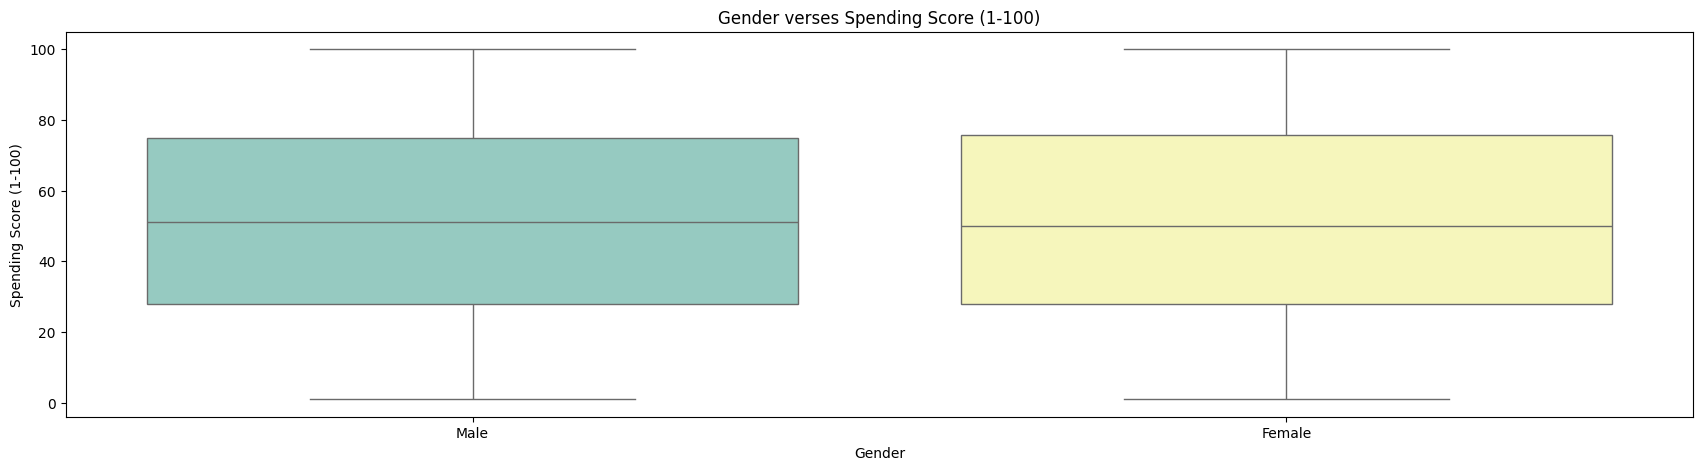

In [45]:
#Plot for Gender verses Spending scrore
plt.figure(figsize = (21,5))
sns.boxplot(x = 'Gender', y = 'Spending Score (1-100)', data = df, palette = 'Set3')
plt.title ('Gender verses Spending Score (1-100)')
plt.xlabel ('Gender')
plt.ylabel ('Spending Score (1-100)')
plt.show()

In [46]:
fig_age = px.scatter(df, x='Age', y='Spending Score (1-100)',
                     title='Spending Score vs. Age',
                     labels={'Age': 'Age', 'Spending Score (1-100)': 'Spending Score'},
                     trendline='ols')
fig_age.show()

fig_income = px.scatter(df_encoded, x='Annual Income ($)', y='Spending Score (1-100)',
                       title='Spending Score vs. Annual Income',
                       labels={'Annual Income ($)': 'Annual Income ($)', 'Spending Score (1-100)': 'Spending Score'},
                       trendline='ols')
fig_income.show()

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

fig = px.box(df_encoded, x='Gender_Male', y='Spending Score (1-100)',
             title='Spending Score by Gender',
             labels={'Gender': 'Gender', 'Spending Score (1-100)': 'Spending Score'},
             category_orders={'Gender': [0, 1]})

fig.update_xaxes(tickmode='array', tickvals=[0, 1], ticktext=['Female', 'Male'])

fig.show()

In [47]:
fig_familia = px.scatter(df_encoded, x='Family Size', y='Spending Score (1-100)',
                 title='Spending Score vs. Family Size',
                 labels={'Family Size': 'Family Size', 'Spending Score (1-100)': 'Spending Score'},
                 trendline='ols')


fig_familia.show()

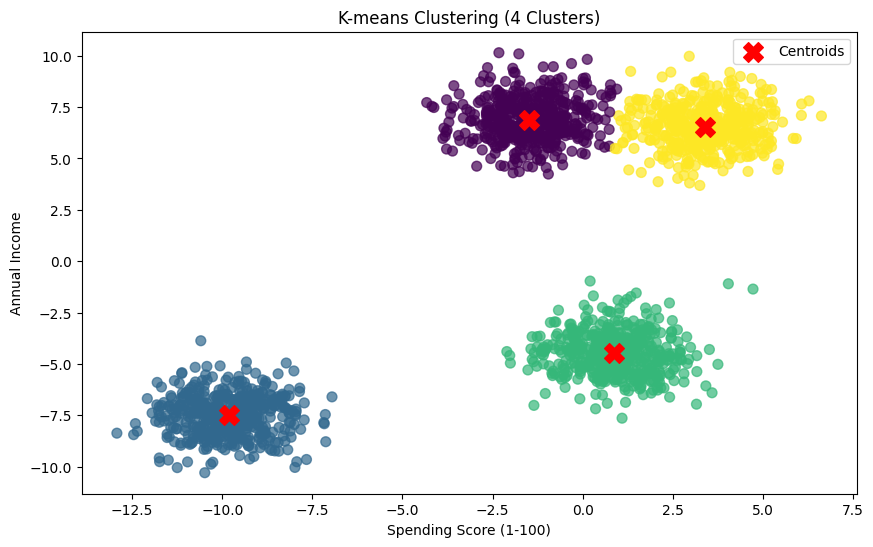

In [68]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Step 2: Generate synthetic data (you can replace this with your own dataset)
X, _ = make_blobs(n_samples=1965, centers=4, random_state=100)

# Step 3: Apply K-means clustering with 4 clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

# Step 4: Get the labels (which cluster each point belongs to) and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Step 5: Plot the results
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering (4 Clusters)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income')
plt.legend()
plt.show()
